# Sensory analysis 

> 2-way ANOVA... examines the effect of two different categorical independent variables or two independent factors on one continuous depedent variable.

> Balanced design... all sample sizes for all combinations of groups are equal. 


### 0. Setup

In [1]:
import pandas as pd
import numpy as np

# Statics 
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.formula.api import ols
from math import pi

# Visualizations 
import seaborn as sns
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
workdir = '/Users/lfloerl/Desktop/MICROTERROIR/curated_data'
%cd $workdir

/Users/lfloerl/Desktop/MICROTERROIR/curated_data


In [3]:
# read in 
data = pd.read_csv('Sensory_analysis_2023_06_01.csv')

# Replace all zeros with 0.001 (some judges put a lot of zeros, to still interpret these values we replace them with a very small one)
data = data.replace(0, 0.001)

In [4]:
data

,Sample,Judge,Olfactory_intensity,Citrus,Exotic_fruit,White_fruit,Floral,Green_notes,Honey,Milk,...,Olfactory_complexity,CO2,Acidity,Bitterness,Sweetness,Volume_in_the_mouth,Balance,Alcohol,Freshness_on_the_palate,Aromatic_length
0,CH-2204,Juge 1,8.25,1.17,3.14,5.28,2.44,0.15,1.19,0.06,...,5.01,0.41,4.32,3.54,0.44,5.68,2.56,5.21,1.66,5.35
1,CH-2205,Juge 1,5.28,1.62,0.55,3.05,1.26,2.42,1.04,4.74,...,3.58,0.37,3.96,3.63,0.97,4.97,2.13,4.63,2.49,5.06
2,CH-2209,Juge 1,4.16,0.08,0.06,1.73,1.26,2.33,1.95,0.68,...,3.52,0.88,3.58,4.52,2.31,3.94,3.61,3.36,4.43,3.40
3,CH-2212,Juge 1,3.45,0.01,0.03,1.28,1.08,2.20,1.26,3.45,...,3.20,0.28,4.25,4.86,0.59,4.65,3.09,5.46,2.38,5.23
4,CH-2213,Juge 1,4.79,0.55,0.95,2.22,0.15,1.19,0.81,3.40,...,5.88,0.26,5.12,4.70,0.81,5.28,3.61,4.32,2.82,4.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,CH-2214,Juge 12,6.85,0.14,0.14,6.90,2.83,7.82,4.45,0.18,...,5.62,0.09,7.84,5.93,6.00,4.13,0.09,2.00,2.88,9.06
116,CH-2215,Juge 12,6.18,0.20,2.63,6.16,2.61,0.18,4.54,2.54,...,6.79,0.14,8.85,6.27,1.71,1.69,0.16,1.64,3.28,8.90
117,CH-2217,Juge 12,6.54,0.09,0.14,3.53,0.11,0.11,4.46,5.30,...,3.71,0.11,8.92,6.11,5.03,3.78,0.14,2.00,2.56,9.53
118,CH-2219,Juge 12,6.02,0.14,0.18,3.69,2.20,3.73,3.78,0.14,...,5.21,0.11,6.70,6.56,4.47,3.17,0.18,1.66,2.25,7.78


In [5]:
# these are my categorical and numerical columns 
categorical_cols = ['Sample', 'Judge']
numeric_cols = [col for col in data.columns if col not in categorical_cols]

### Test and have a look if data is normally distributed 

... nope!

In [6]:
# Perform normality tests for each column
for column in data[numeric_cols]:
    values = data[column]
    
    # Shapiro-Wilk test
    shapiro_test = stats.shapiro(values)
    shapiro_statistic = shapiro_test.statistic
    shapiro_p_value = shapiro_test.pvalue
    
    # Anderson-Darling test
    anderson_test = stats.anderson(values)
    anderson_statistic = anderson_test.statistic
    anderson_critical_values = anderson_test.critical_values
    anderson_significance_level = anderson_test.significance_level
    
    print(f'Column: {column}')
    print('Shapiro-Wilk Test:')
    print(f'Statistic: {shapiro_statistic}')
    print(f'p-value: {shapiro_p_value}')
    print('Anderson-Darling Test:')
    print(f'Statistic: {anderson_statistic}')
    print(f'Critical Values: {anderson_critical_values}')
    print(f'Significance Level: {anderson_significance_level}')
    print('\n')


Column: Olfactory_intensity
Shapiro-Wilk Test:
Statistic: 0.9842798709869385
p-value: 0.17688411474227905
Anderson-Darling Test:
Statistic: 0.7564745175924656
Critical Values: [0.558 0.636 0.763 0.89  1.059]
Significance Level: [15.  10.   5.   2.5  1. ]


Column: Citrus
Shapiro-Wilk Test:
Statistic: 0.7042382955551147
p-value: 3.141634698157654e-14
Anderson-Darling Test:
Statistic: 15.743182248793602
Critical Values: [0.558 0.636 0.763 0.89  1.059]
Significance Level: [15.  10.   5.   2.5  1. ]


Column: Exotic_fruit
Shapiro-Wilk Test:
Statistic: 0.7923332452774048
p-value: 9.745442300368445e-12
Anderson-Darling Test:
Statistic: 9.262466502640649
Critical Values: [0.558 0.636 0.763 0.89  1.059]
Significance Level: [15.  10.   5.   2.5  1. ]


Column: White_fruit
Shapiro-Wilk Test:
Statistic: 0.9261829853057861
p-value: 5.6045037126750685e-06
Anderson-Darling Test:
Statistic: 2.251959562878767
Critical Values: [0.558 0.636 0.763 0.89  1.059]
Significance Level: [15.  10.   5.   2.5  1.

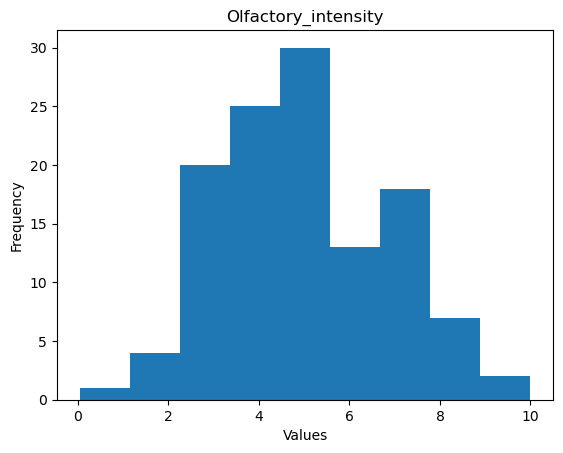

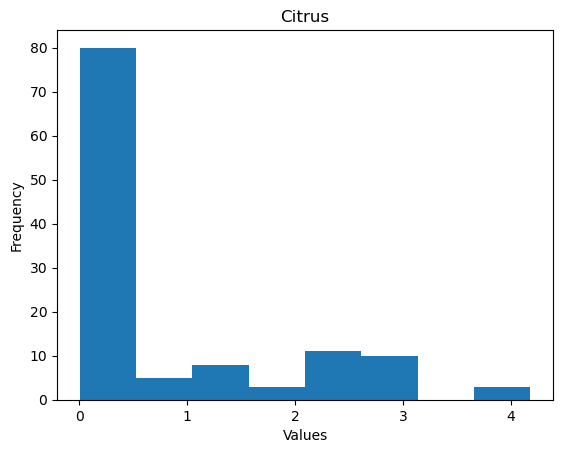

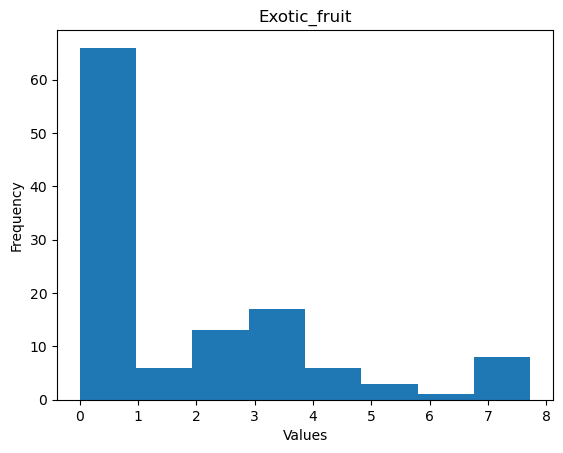

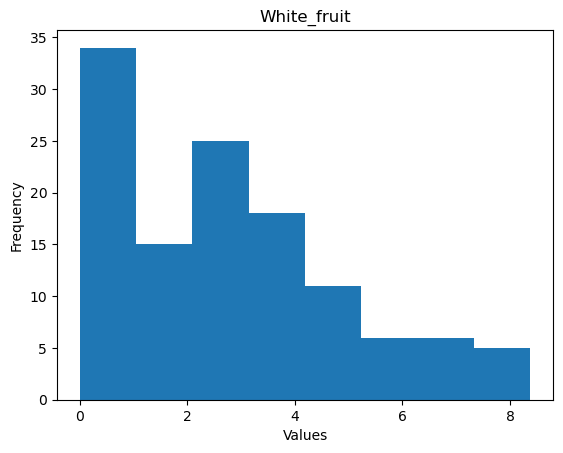

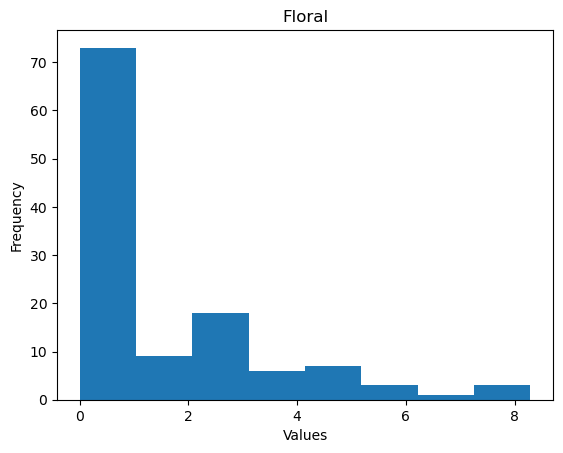

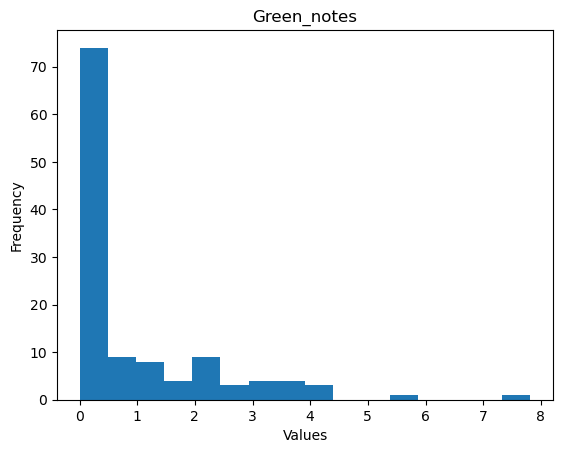

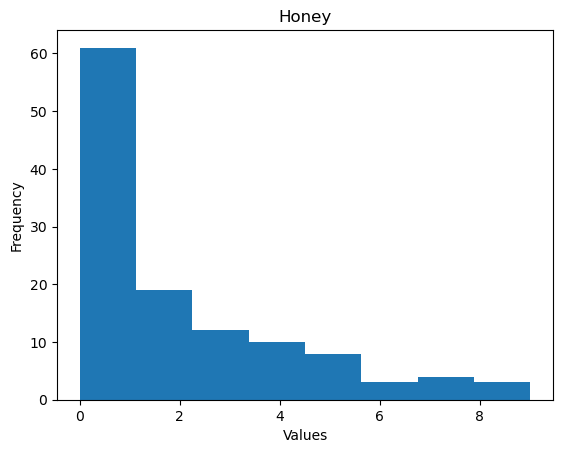

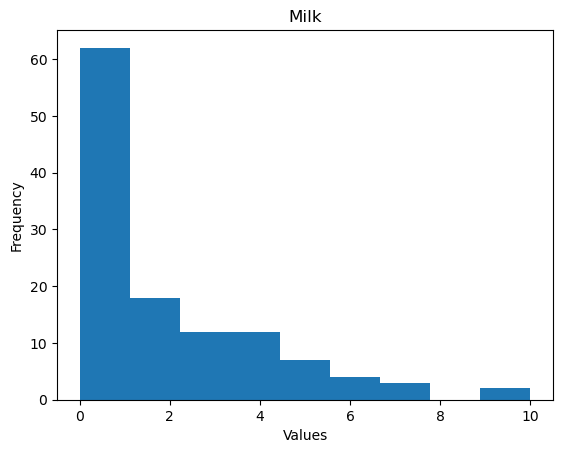

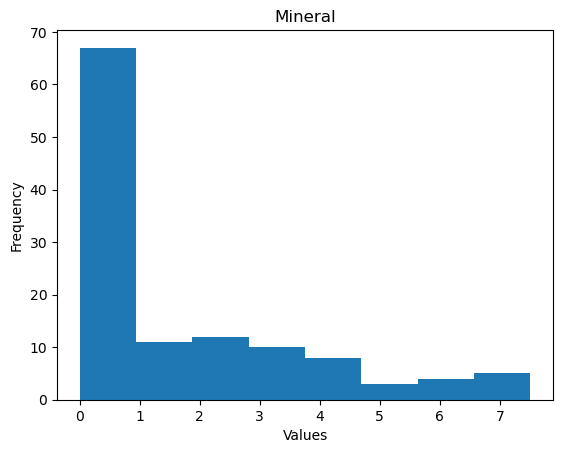

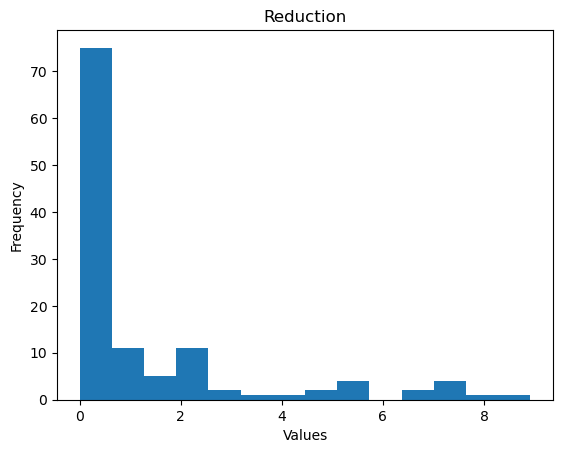

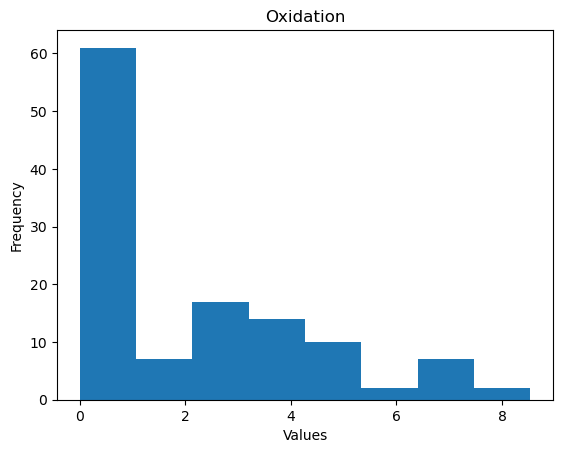

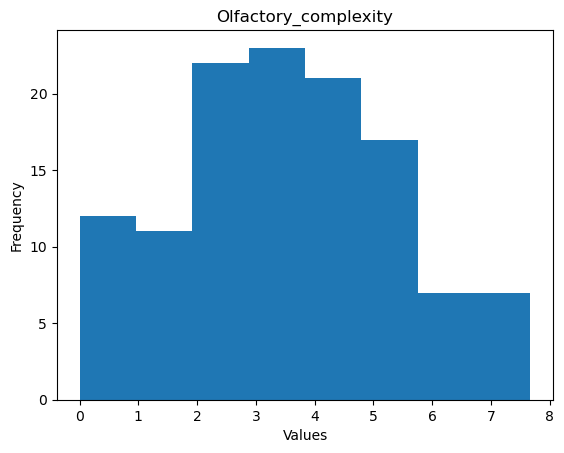

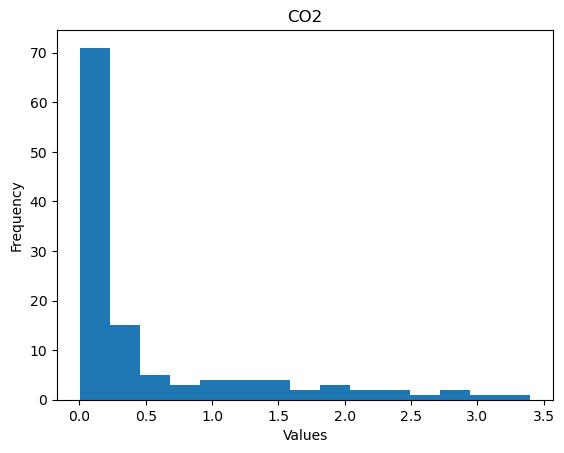

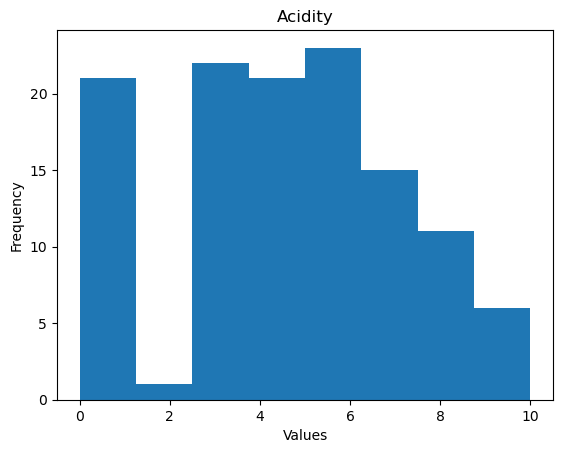

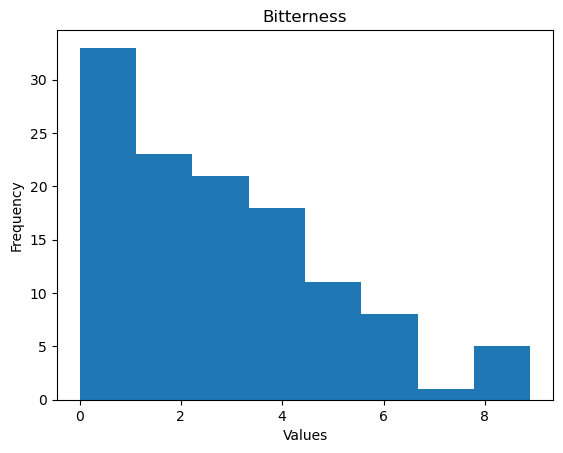

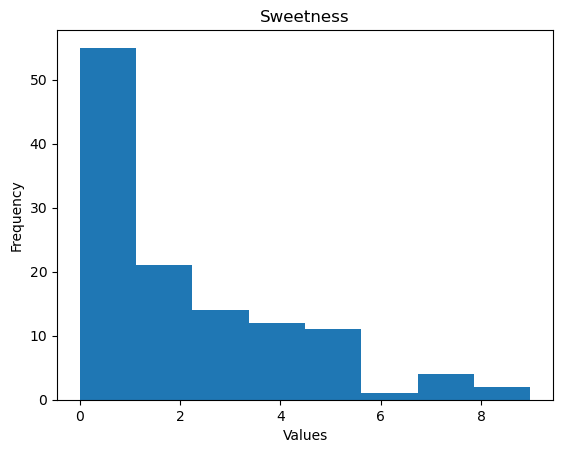

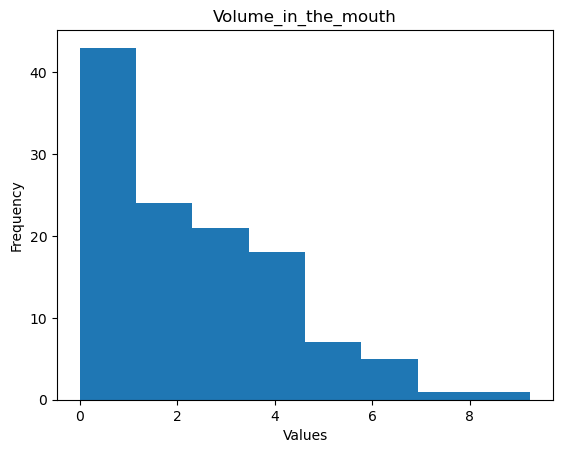

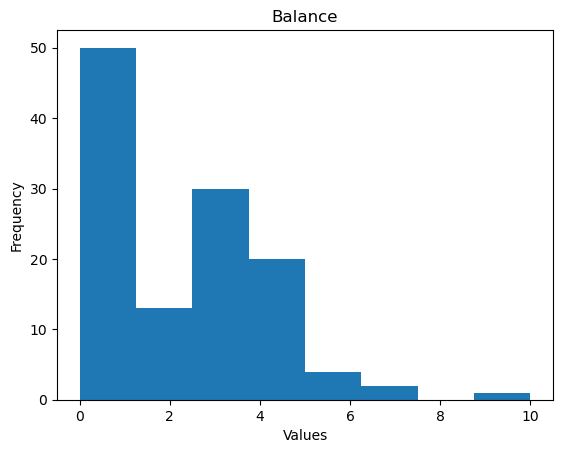

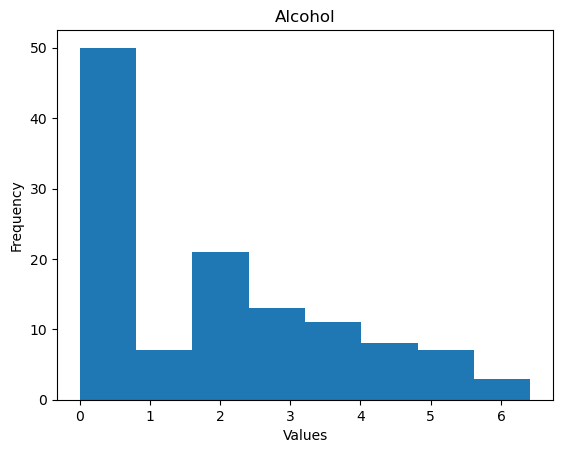

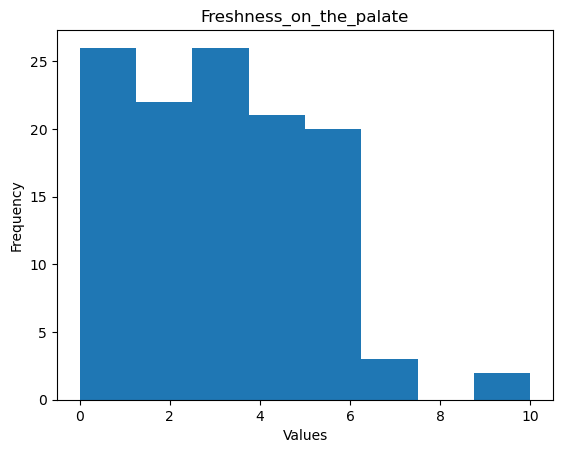

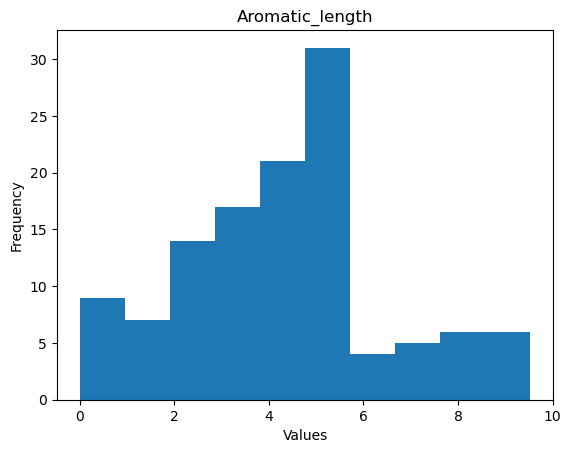

In [7]:
# Create frequency histograms for each column
for column in data[numeric_cols]:
    values = data[column]
    
    # Plot histogram
    plt.hist(values, bins='auto')
    
    # Set title and labels
    plt.title(column)
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    
    # Display the histogram
    plt.show()

## 2. Two-way ANOVA

In [8]:
# Two way ANOVA for all columns - note since we have no replicates we cannot test the interactions

# save the respective p values in the lists 
p_value_sample = []
p_value_judge = []

# iterate over all columns and calculate the p value for each factor 
for col in data[numeric_cols]:
    formula = f'{col} ~ {categorical_cols[1]} + {categorical_cols[0]}'
    model = ols(formula, data=data).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    p_value_sample.append("{:.2e}".format(anova_table.at['Sample','PR(>F)']))
    p_value_judge.append("{:.2e}".format(anova_table.at['Judge','PR(>F)']))
    print(f"Results for {col}:\n{anova_table}\n")

Results for Olfactory_intensity:
              sum_sq    df          F        PR(>F)
Judge     242.469929  11.0  13.845124  1.080151e-15
Sample      8.919571   9.0   0.622491  7.753671e-01
Residual  157.617179  99.0        NaN           NaN

Results for Citrus:
             sum_sq    df          F        PR(>F)
Judge     77.339185  11.0  10.267053  2.838284e-12
Sample     8.671212   9.0   1.406942  1.953910e-01
Residual  67.794786  99.0        NaN           NaN

Results for Exotic_fruit:
              sum_sq    df         F        PR(>F)
Judge     225.366127  11.0  6.543091  4.264684e-08
Sample     33.903234   9.0  1.203055  3.017646e-01
Residual  309.990339  99.0       NaN           NaN

Results for White_fruit:
              sum_sq    df         F    PR(>F)
Judge     172.399673  11.0  4.083847  0.000061
Sample     47.115254   9.0  1.364095  0.214736
Residual  379.935173  99.0       NaN       NaN

Results for Floral:
              sum_sq    df         F    PR(>F)
Judge     143.181271 

## PCA
... visually check the scatter of samples by the metadata categories. 

In [9]:
# scale the data to the range between 0 and 1 before using PCA
scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(data[numeric_cols])

In [10]:
# explaine 95% of variance
pca = PCA(n_components = 0.95)
pca.fit(data_rescaled)
reduced = pca.transform(data_rescaled)

data_pca = data 

# Add PCA results to dataframe
data_pca['PC1'] = reduced[:, 0]
data_pca['PC2'] = reduced[:, 1]

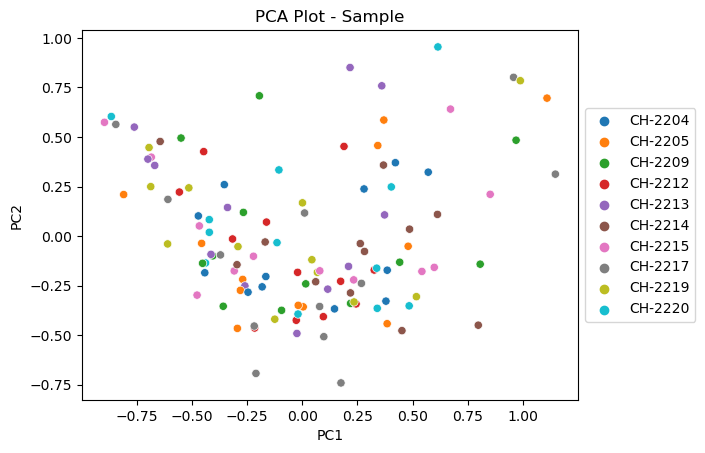

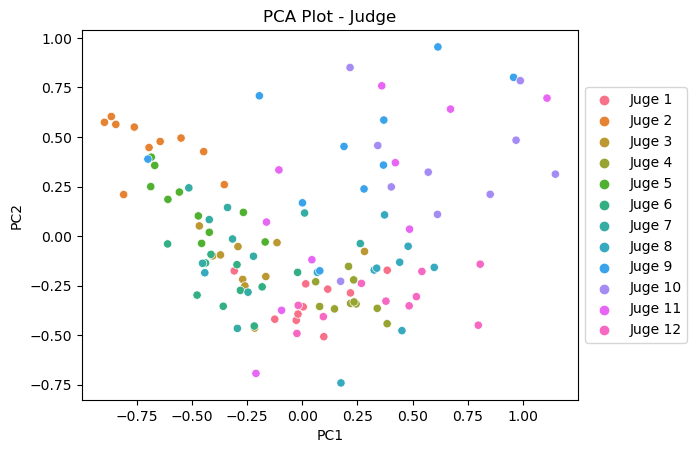

In [11]:
# Plot scatterplot with colors based on Category1
sns.scatterplot(data=data_pca, x='PC1', y='PC2', hue='Sample')
plt.title('PCA Plot - Sample')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# Plot scatterplot with colors based on Category2
sns.scatterplot(data=data_pca, x='PC1', y='PC2', hue='Judge')
plt.title('PCA Plot - Judge')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## Box Plots 

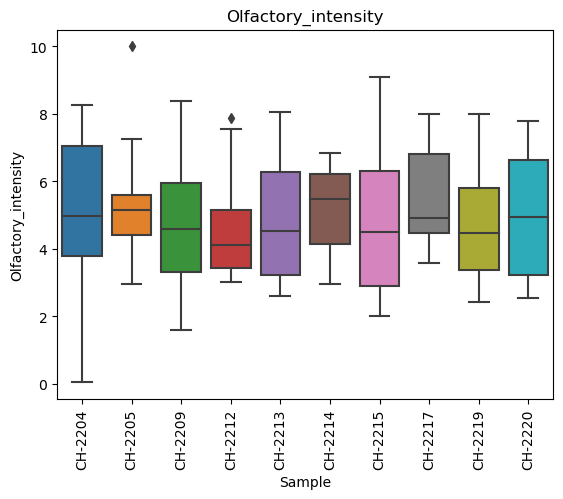

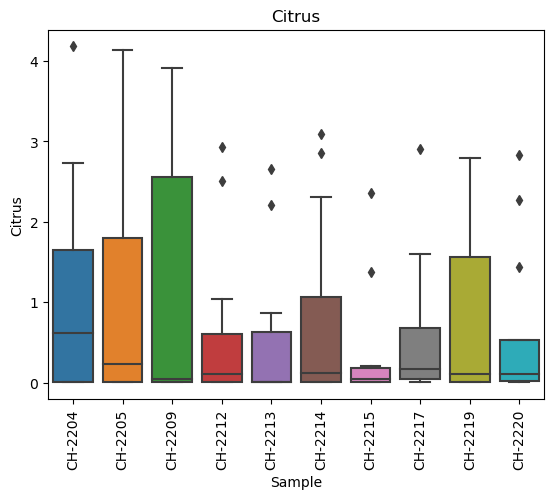

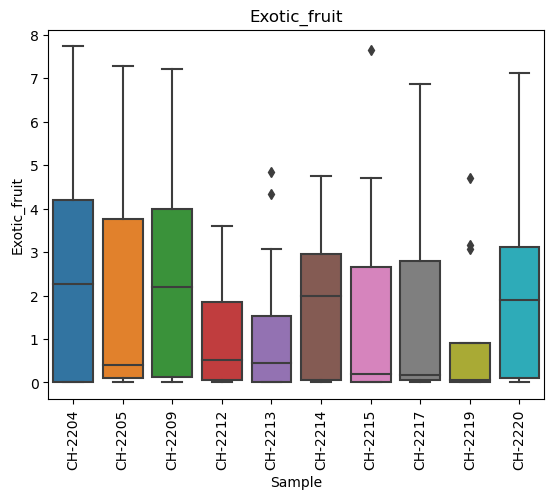

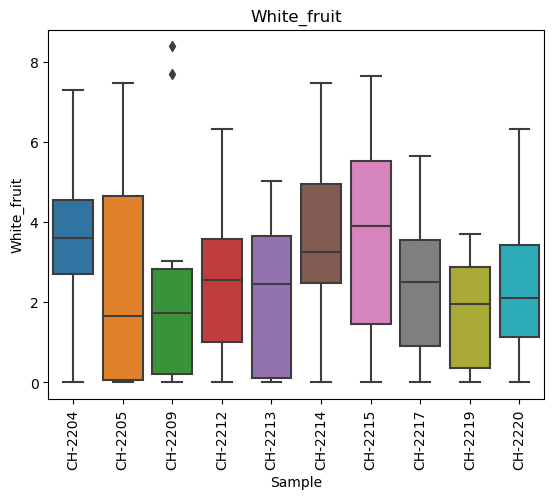

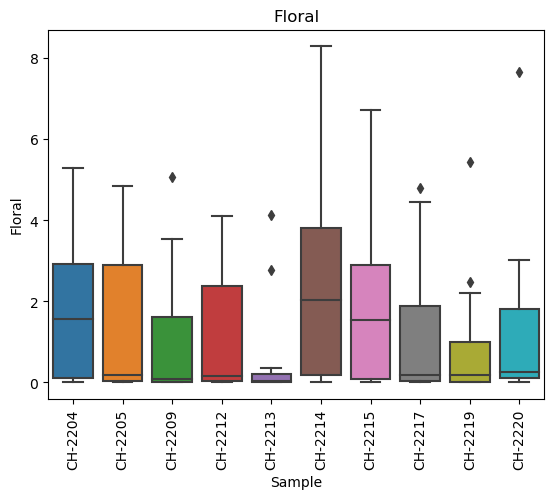

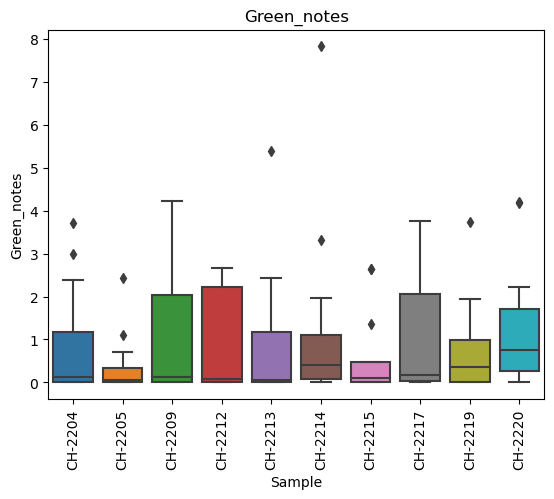

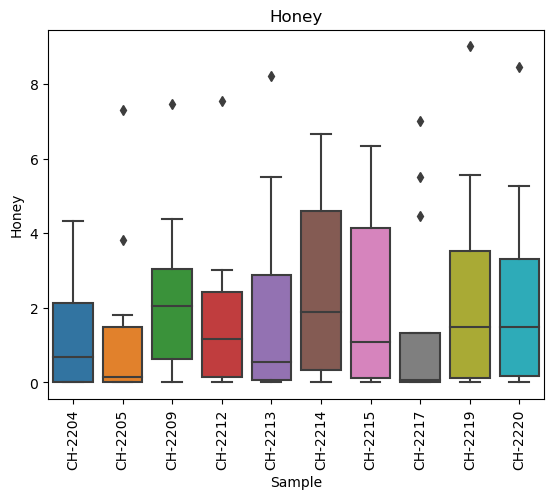

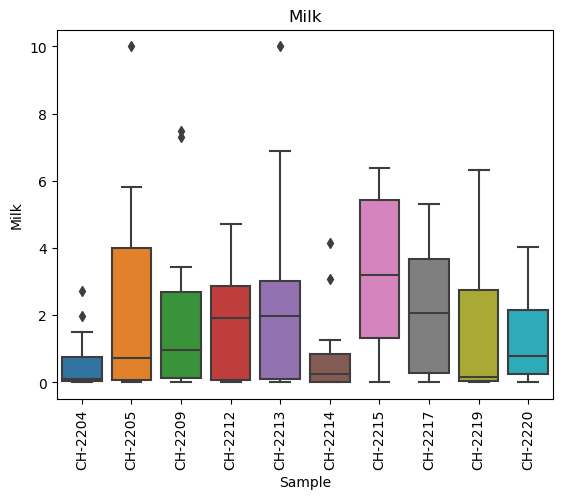

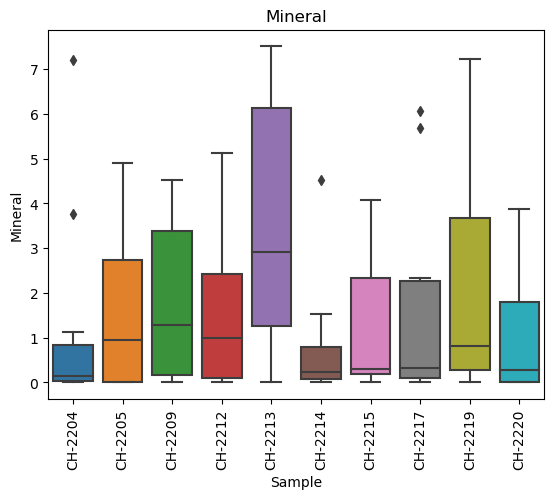

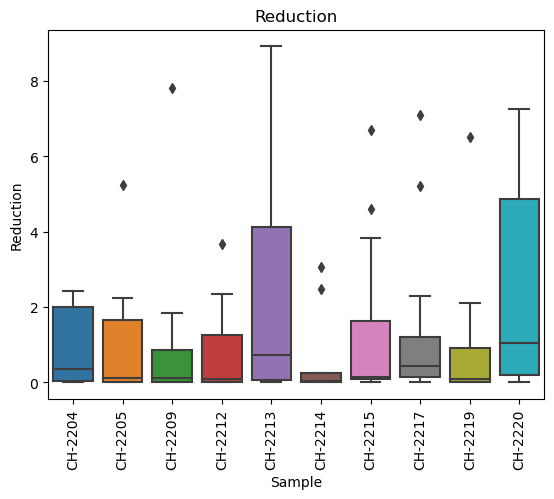

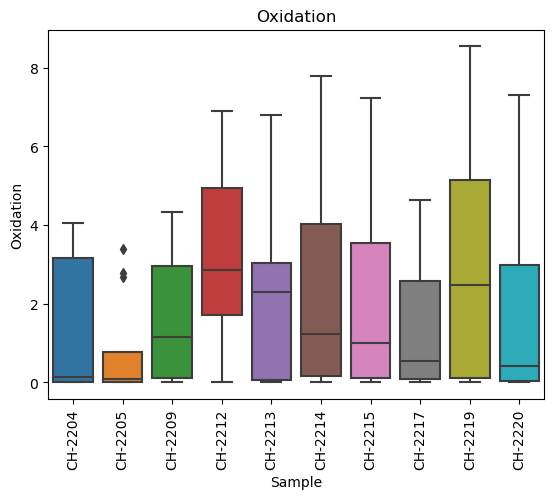

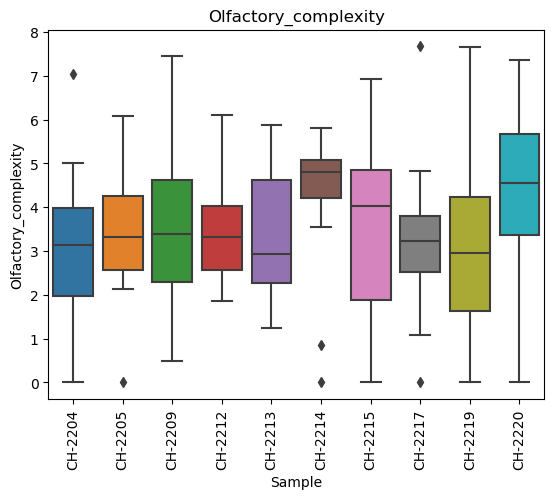

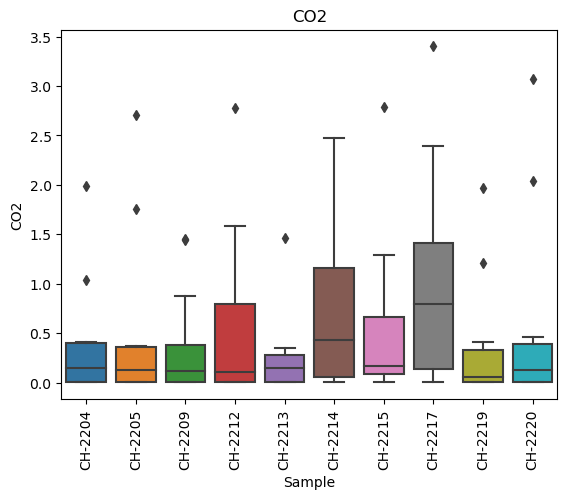

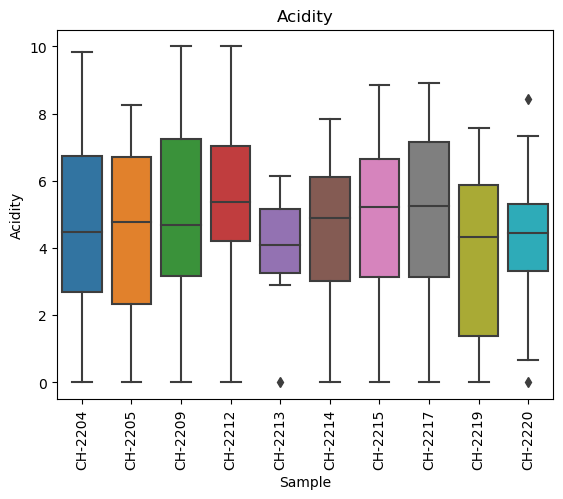

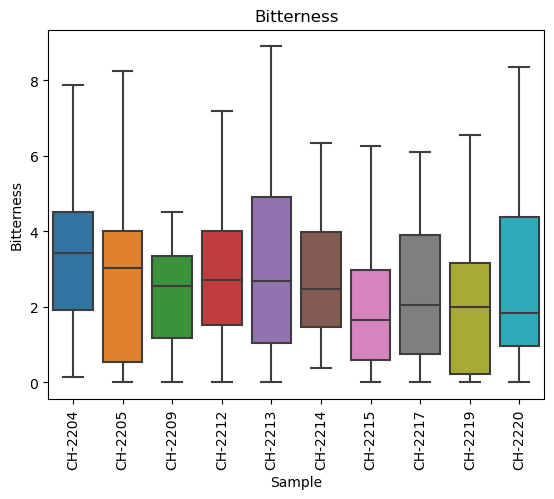

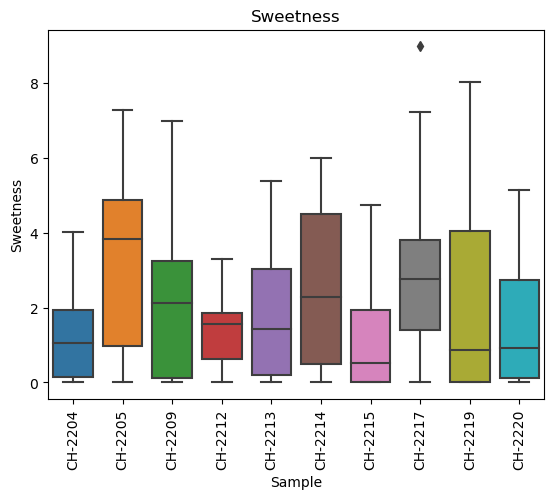

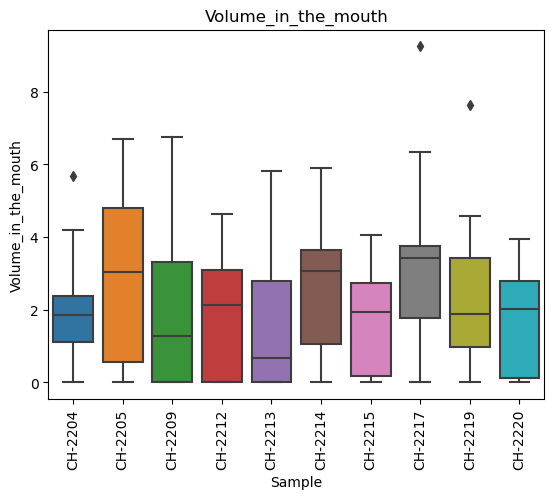

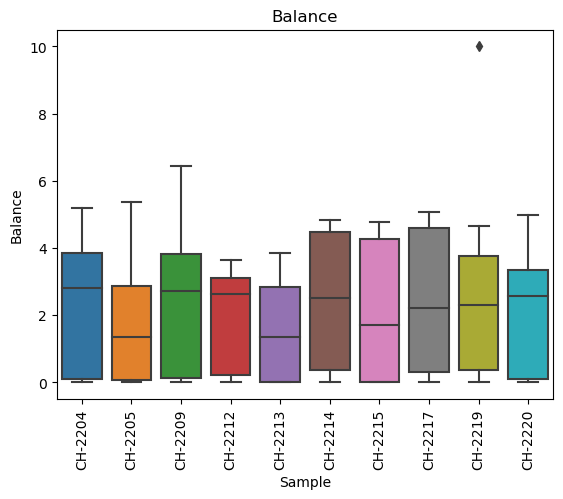

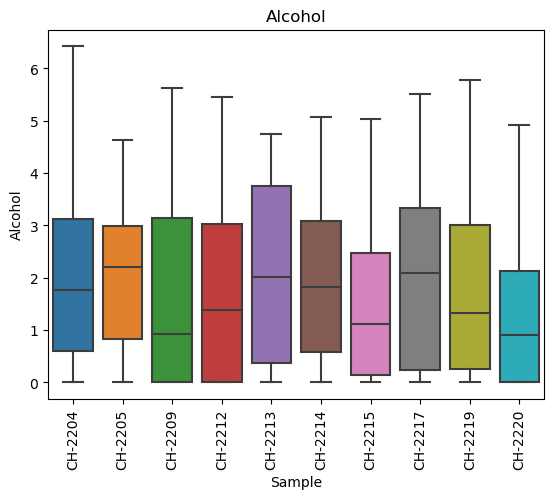

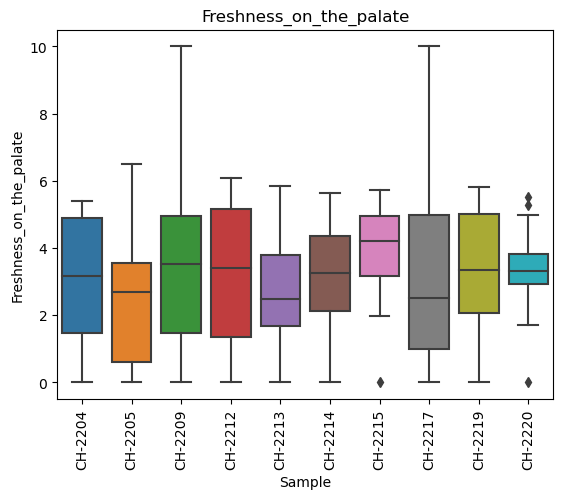

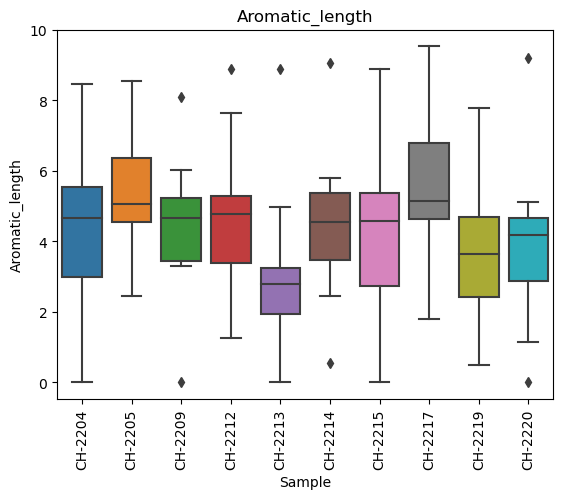

In [12]:
# individual box plots 
for col in numeric_cols:
    plt.figure()
    sns.boxplot(data=data, x='Sample', y=col)
    plt.title(f"{col}")
    plt.xlabel('Sample')
    plt.xticks(rotation=90)
    plt.ylabel(col)
    plt.show()

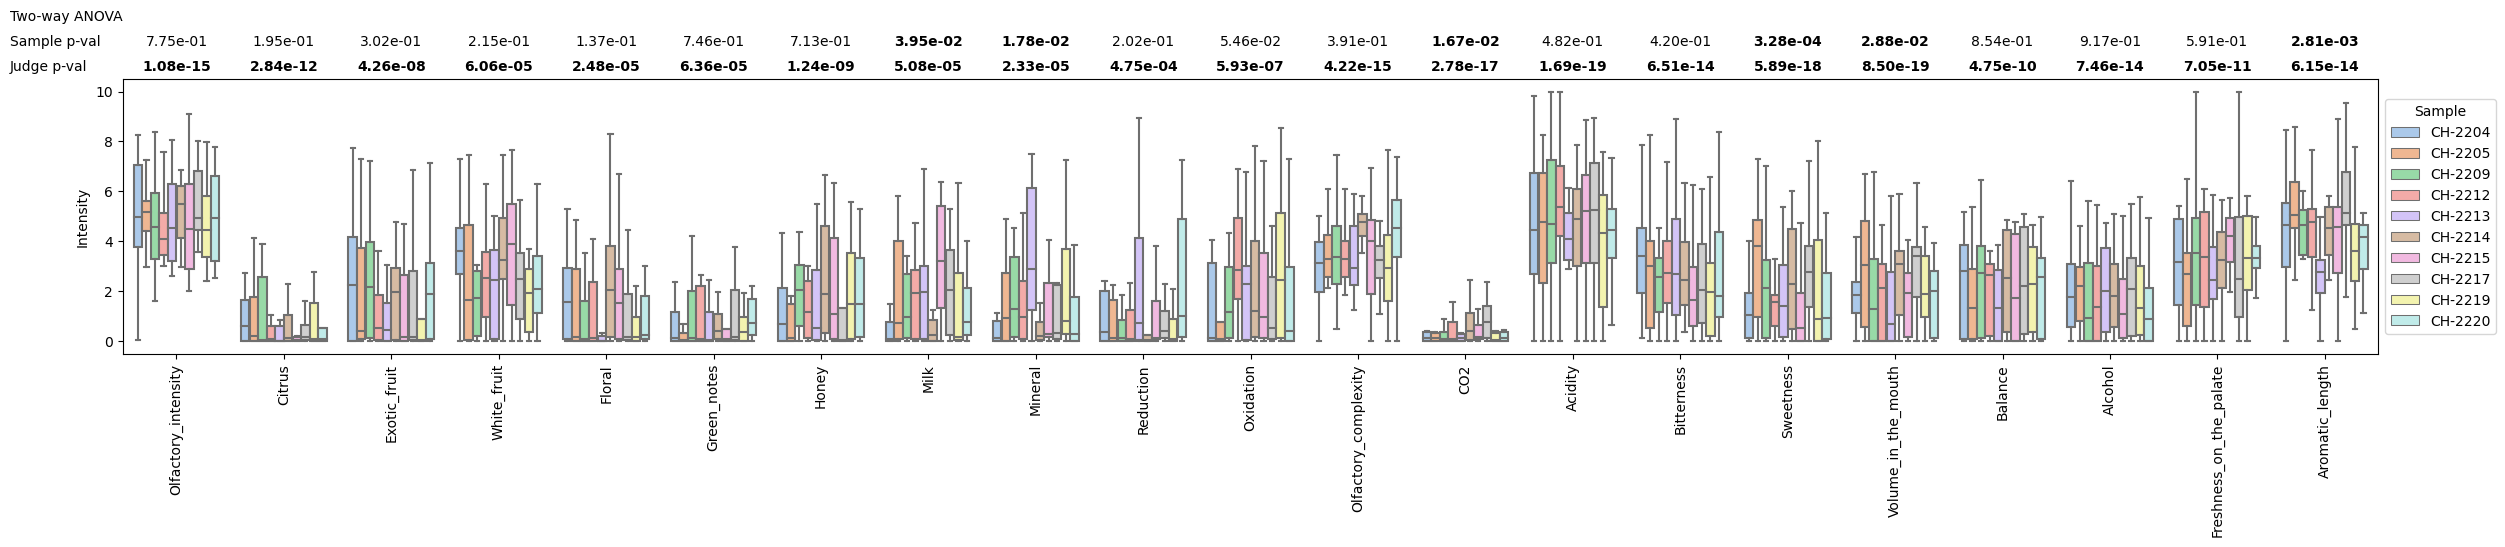

In [13]:
# one big box plot 
df_long = pd.melt(data, id_vars=['Sample'], value_vars=numeric_cols, var_name='Numeric')

sns.set_palette("pastel")

# make box plots with seaborn 
plt.figure(figsize=(25, 6))
ax = sns.boxplot(data=df_long, x='Numeric', y='value', hue='Sample',
            showfliers=False ) #, medianprops={'color': 'black'})


x_coordinates = range(len(df_long['Numeric'].unique()))


for x, (p_sample, p_judge) in zip(x_coordinates, zip(p_value_sample, p_value_judge)):
    if float(p_sample) < 0.05:
        ax.text(x, 12, p_sample, ha='center', va='center', fontsize=10, fontweight='bold')
    else:
        ax.text(x, 12, p_sample, ha='center', va='center', fontsize=10)
    if float(p_judge) <0.05:
        ax.text(x, 11, p_judge, ha='center', va='center', fontsize=10, fontweight='bold')
    else:
        ax.text(x, 11, p_judge, ha='center', va='center', fontsize=10)

ax.text(-1.55, 13, 'Two-way ANOVA', ha='left', va='center', fontsize=10)
ax.text(-1.55, 12, 'Sample p-val', ha='left', va='center', fontsize=10)
ax.text(-1.55, 11, 'Judge p-val', ha='left', va='center', fontsize=10)

# labeling 
plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('Intensity')
#plt.title('Box Plots Grouped by "sample"')
plt.legend(title='Sample', loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

## Get median sensory values for each plot 

... save as a csv which can later be used as metadata? 

In [14]:
median_data = data.groupby('Sample').median().reset_index()
#median_data = median_data.drop(['PC1','PC2'], axis = 1)
median_data

/var/folders/vs/cscnsm_n1pq4d37fdkylmm940000gq/T/ipykernel_74943/2948521833.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  median_data = data.groupby('Sample').median().reset_index()


,Sample,Olfactory_intensity,Citrus,Exotic_fruit,White_fruit,Floral,Green_notes,Honey,Milk,Mineral,...,Acidity,Bitterness,Sweetness,Volume_in_the_mouth,Balance,Alcohol,Freshness_on_the_palate,Aromatic_length,PC1,PC2
0,CH-2204,4.960,0.6150,2.265,3.600,1.5650,0.1250,0.690,0.095,0.140,...,4.475,3.425,1.050,1.865,2.800,1.770,3.165,4.655,-0.009264,-0.178853
1,CH-2205,5.160,0.2300,0.405,1.665,0.1850,0.0500,0.140,0.730,0.940,...,4.775,3.020,3.830,3.050,1.340,2.200,2.700,5.060,-0.006752,-0.135160
2,CH-2209,4.580,0.0405,2.185,1.740,0.0950,0.1200,2.055,0.965,1.295,...,4.680,2.565,2.135,1.280,2.735,0.925,3.535,4.670,-0.143721,-0.134839
3,CH-2212,4.100,0.1050,0.520,2.545,0.1500,0.0800,1.175,1.920,0.995,...,5.380,2.725,1.560,2.140,2.640,1.380,3.395,4.765,-0.023916,-0.177349
4,CH-2213,4.520,0.0105,0.445,2.455,0.0255,0.0505,0.545,1.980,2.915,...,4.085,2.690,1.430,0.680,1.340,2.010,2.470,2.790,-0.141736,0.125467
5,CH-2214,5.480,0.1200,1.995,3.265,2.0400,0.4100,1.880,0.265,0.235,...,4.900,2.465,2.280,3.080,2.520,1.820,3.255,4.555,0.272531,-0.057847
6,CH-2215,4.510,0.0450,0.190,3.890,1.5400,0.1000,1.085,3.205,0.305,...,5.225,1.650,0.525,1.945,1.720,1.110,4.200,4.580,-0.070611,-0.130000
7,CH-2217,4.925,0.1700,0.175,2.505,0.1850,0.1850,0.070,2.055,0.320,...,5.245,2.050,2.775,3.425,2.220,2.095,2.515,5.155,0.044818,-0.166994
8,CH-2219,4.465,0.1100,0.055,1.945,0.1800,0.3700,1.500,0.165,0.810,...,4.340,1.995,0.880,1.890,2.300,1.320,3.355,3.635,-0.061559,-0.046501
9,CH-2220,4.940,0.1100,1.905,2.100,0.2700,0.7550,1.485,0.780,0.280,...,4.440,1.830,0.930,2.030,2.580,0.900,3.330,4.170,-0.062313,-0.007213


### Some more plotting 

--> Radar Chart https://python-graph-gallery.com/392-use-faceting-for-radar-chart/

In [15]:
# ------- PART 1: Define a function that do a plot for one line of the dataset!
 
def make_spider( row, title, color):

    # number of variable
    categories=list(median_data)[1:]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(2,5,row+1, polar=True, )

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([2.5,5,7.5,10], ["2.5","5","7.5","10"], color="grey", size=7)
    plt.ylim(0,10)

    # Ind1
    values=median_data.loc[row].drop('Sample').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=11, color=color, y=1.1)


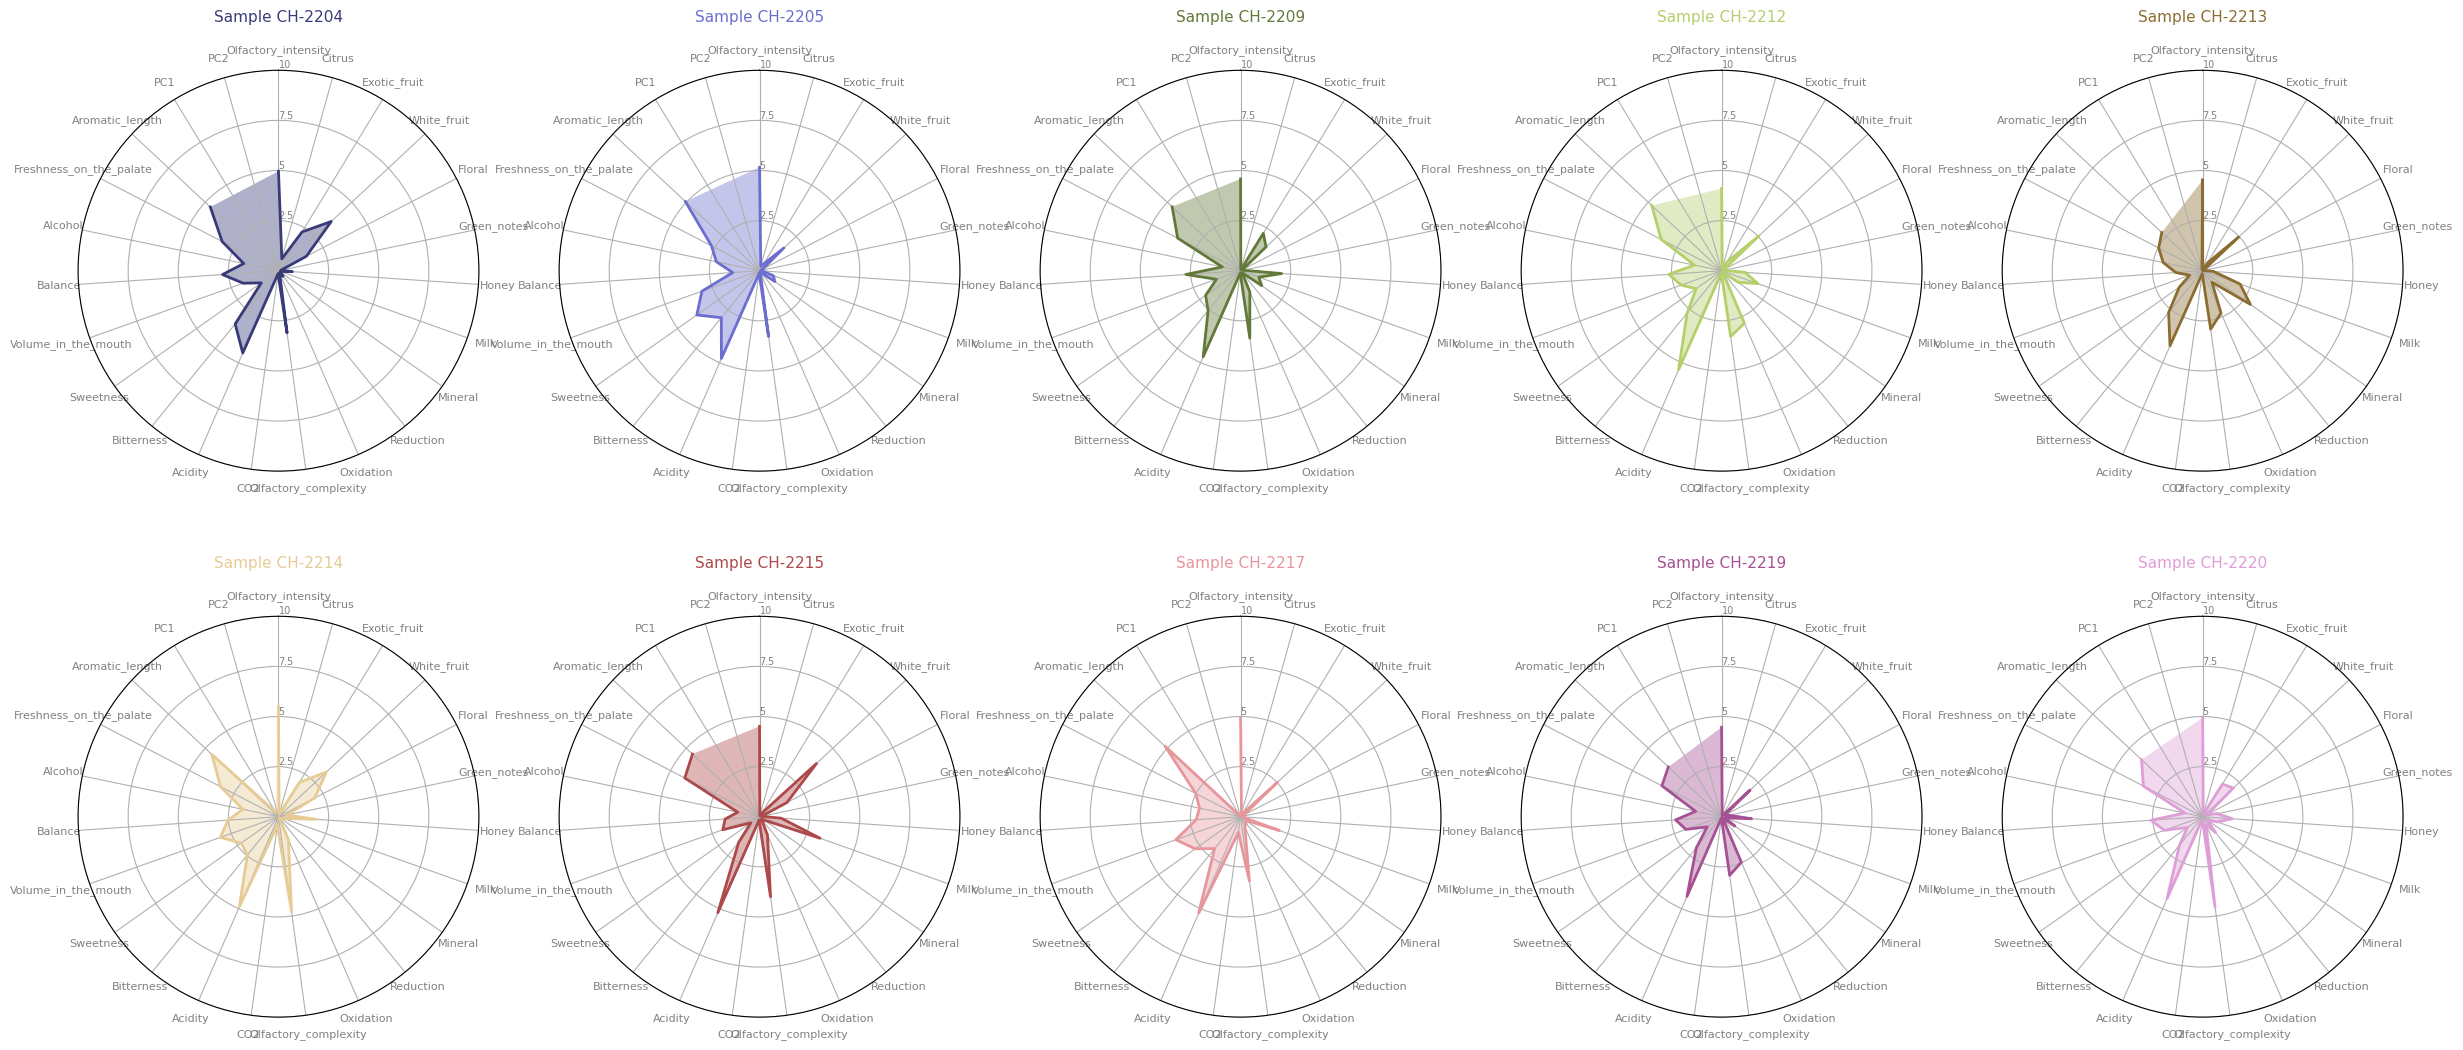

In [16]:
# ------- PART 2: Apply the function to all individuals
# initialize the figure
plt.figure(figsize=(30,13), dpi=100)


# Create a color palette:
my_palette = plt.cm.get_cmap("tab20b", len(median_data.index))
 
# Loop to plot
for row in range(0, len(median_data.index)):
    make_spider(row=row, title='Sample '+median_data['Sample'][row], color=my_palette(row))